In [1]:
import numpy as np

In [2]:
%matplotlib notebook

In [3]:
import matplotlib.pyplot as plt 

In [18]:
#Initialising the datasets using numpy.random.random
#ds implies dataset
ds_x = np.random.random(150)
ds_y = np.random.random(150)

<IPython.core.display.Javascript object>


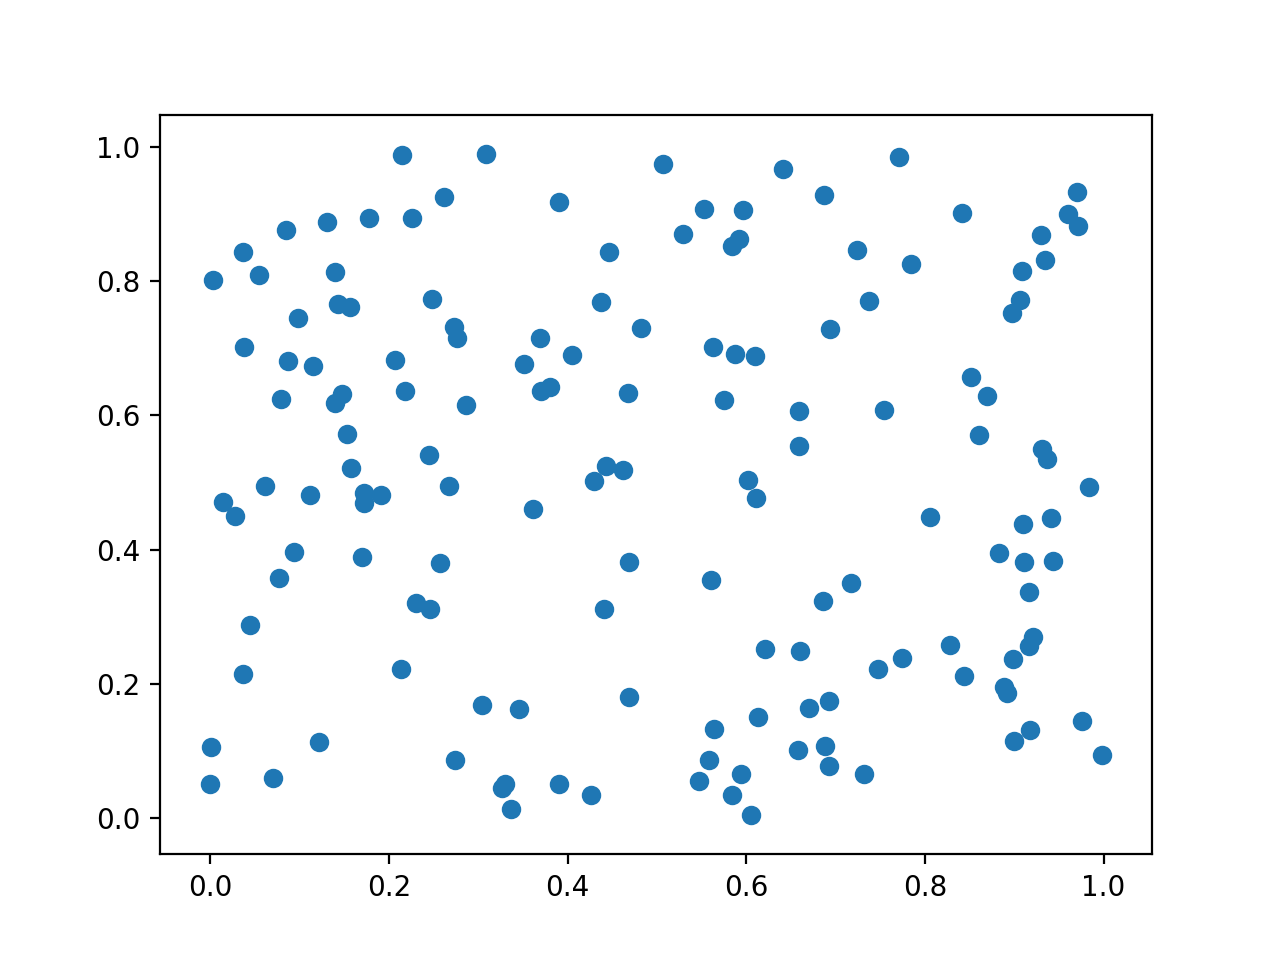

In [19]:
#Visualising the Dataset
plt.figure()
plt.scatter(ds_x,ds_y)

In [20]:
#This module updates the cluster centroid after each iteration
def update_cluster_centroid(centroid_x,centroid_y,ds_x,ds_y,cc):
    for j in range(len(centroid_x)):
        g=[i for i in range(len(cc)) if cc[i]==j]
        g1=ds_x[g]
        g2=ds_y[g]
        length=len(g1)
        centroid_x[j]=np.sum(g1)/length
        centroid_y[j]=np.sum(g2)/length
    return centroid_x,centroid_y

In [21]:
#These lists are used to store data to visualise them later
cluster_cmap=[]
centroids_X=[]
centroids_Y=[]
#This module is the kmeansmodel
#This takes in the x and y co-ordinate values, the number of clusters and the number of iterations
def kmeansmodel(ds_x,ds_y,num_of_clusters,iterations):
    temp_centroid_x=[]
    temp_centroid_y=[]
    temp_centroid_x.extend(np.random.random(num_of_clusters))
    temp_centroid_y.extend(np.random.random(num_of_clusters))
    final_centroid_x=[[temp_centroid_x[:]]]
    final_centroid_y=[[temp_centroid_y[:]]]
    final_cluster_cmap=[]
    for i in range(iterations):
        print "Iteration\t",i
        temp_variable = group_cluster(temp_centroid_x,temp_centroid_y,ds_x,ds_y)
        final_cluster_cmap.append(temp_variable[:])
        temp_centroid_x, temp_centroid_y = update_cluster_centroid(temp_centroid_x,temp_centroid_y,ds_x,ds_y,temp_variable)
        final_centroid_x.append([temp_centroid_x[:]])
        final_centroid_y.append([temp_centroid_y[:]])
    temp_variable = group_cluster(temp_centroid_x,temp_centroid_y,ds_x,ds_y)
    final_cluster_cmap.append(temp_variable[:])
    cluster_cmap.append(final_cluster_cmap)
    print cluster_cmap
    centroids_X.append(final_centroid_x)
    centroids_Y.append(final_centroid_y)

In [22]:
#This module finds the closest centroid for each data point
def closest_centroid(c1,c2,x1,x2):
    temp_var = []
    for i in range(len(c1)):
        temp_var.append(np.sqrt( ((c1[i]-x1)**2) + ((c2[i]-x2)**2) ))
    return np.argmin(temp_var)

In [23]:

def group_cluster(b_x,b_y,ds_x,ds_y):#b_x and b_y are centroid list; ds_x and ds_y are the data points
    cc=[]
    for i in range(len(ds_x)):
        cc.append(closest_centroid(b_x,b_y,ds_x[i],ds_y[i]))
    return cc

In [24]:
#I have given 6 centroids; 5 iterations to update the centroid
kmeansmodel(ds_x,ds_y,6,5)

Iteration	0
Iteration	1
Iteration	2
Iteration	3
Iteration	4
[[[4, 4, 1, 0, 0, 2, 4, 0, 4, 5, 1, 0, 4, 0, 4, 4, 1, 1, 1, 5, 5, 0, 4, 3, 0, 2, 1, 5, 1, 4, 3, 0, 0, 4, 2, 2, 4, 4, 5, 1, 1, 0, 4, 5, 0, 4, 4, 2, 1, 4, 1, 1, 0, 4, 2, 4, 1, 0, 1, 4, 1, 4, 4, 1, 1, 0, 4, 0, 0, 5, 0, 1, 4, 0, 4, 4, 0, 4, 0, 0, 1, 5, 5, 0, 4, 1, 1, 1, 0, 5, 5, 4, 1, 4, 1, 3, 0, 0, 4, 4, 5, 4, 0, 4, 1, 5, 3, 0, 5, 4, 4, 1, 0, 4, 0, 1, 1, 4, 1, 4, 4, 4, 1, 5, 5, 0, 1, 4, 0, 4, 4, 5, 4, 4, 1, 5, 4, 2, 4, 4, 0, 4, 4, 2, 0, 1, 1, 0, 5, 5], [4, 0, 1, 0, 2, 2, 1, 0, 5, 5, 1, 0, 4, 0, 4, 4, 1, 1, 1, 5, 5, 2, 4, 3, 0, 2, 1, 5, 1, 4, 3, 0, 0, 4, 2, 2, 4, 0, 2, 1, 1, 0, 0, 5, 0, 4, 4, 2, 1, 4, 1, 1, 0, 4, 2, 1, 3, 0, 1, 4, 5, 4, 4, 1, 1, 0, 4, 2, 0, 5, 0, 1, 4, 2, 4, 4, 2, 4, 0, 0, 1, 3, 5, 0, 4, 1, 1, 5, 0, 5, 3, 0, 3, 4, 1, 3, 0, 0, 4, 4, 5, 0, 5, 4, 1, 5, 3, 0, 5, 0, 4, 1, 2, 4, 2, 1, 3, 4, 1, 1, 4, 4, 1, 5, 5, 0, 1, 4, 2, 1, 4, 5, 4, 4, 1, 5, 1, 2, 4, 4, 0, 4, 4, 2, 2, 1, 1, 0, 2, 2], [1, 0, 1, 2, 2, 2, 5, 0, 5, 5, 3, 

In [25]:
from matplotlib import animation

In [26]:
#This module is to animate the values stored in the above lists
def animate(iterate):
        plt.cla()
        plt.axis([0.0,1.0,0.0,1.0])
        plt.scatter(ds_x,ds_y,c=cluster_cmap[0][iterate],marker="H",cmap="prism")
        plt.scatter(centroids_X[0][iterate][0][0],centroids_Y[0][iterate][0][0],c='blue',marker='^',s=75)
        plt.scatter(centroids_X[0][iterate][0][1],centroids_Y[0][iterate][0][1],c='blue',marker='^',s=75)
        plt.scatter(centroids_X[0][iterate][0][2],centroids_Y[0][iterate][0][2],c='blue',marker='^',s=75)
        plt.scatter(centroids_X[0][iterate][0][3],centroids_Y[0][iterate][0][3],c='blue',marker='^',s=75)
        plt.scatter(centroids_X[0][iterate][0][4],centroids_Y[0][iterate][0][4],c='blue',marker='^',s=75)
        plt.scatter(centroids_X[0][iterate][0][5],centroids_Y[0][iterate][0][5],c='blue',marker='^',s=75)
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("k-means")

<IPython.core.display.Javascript object>


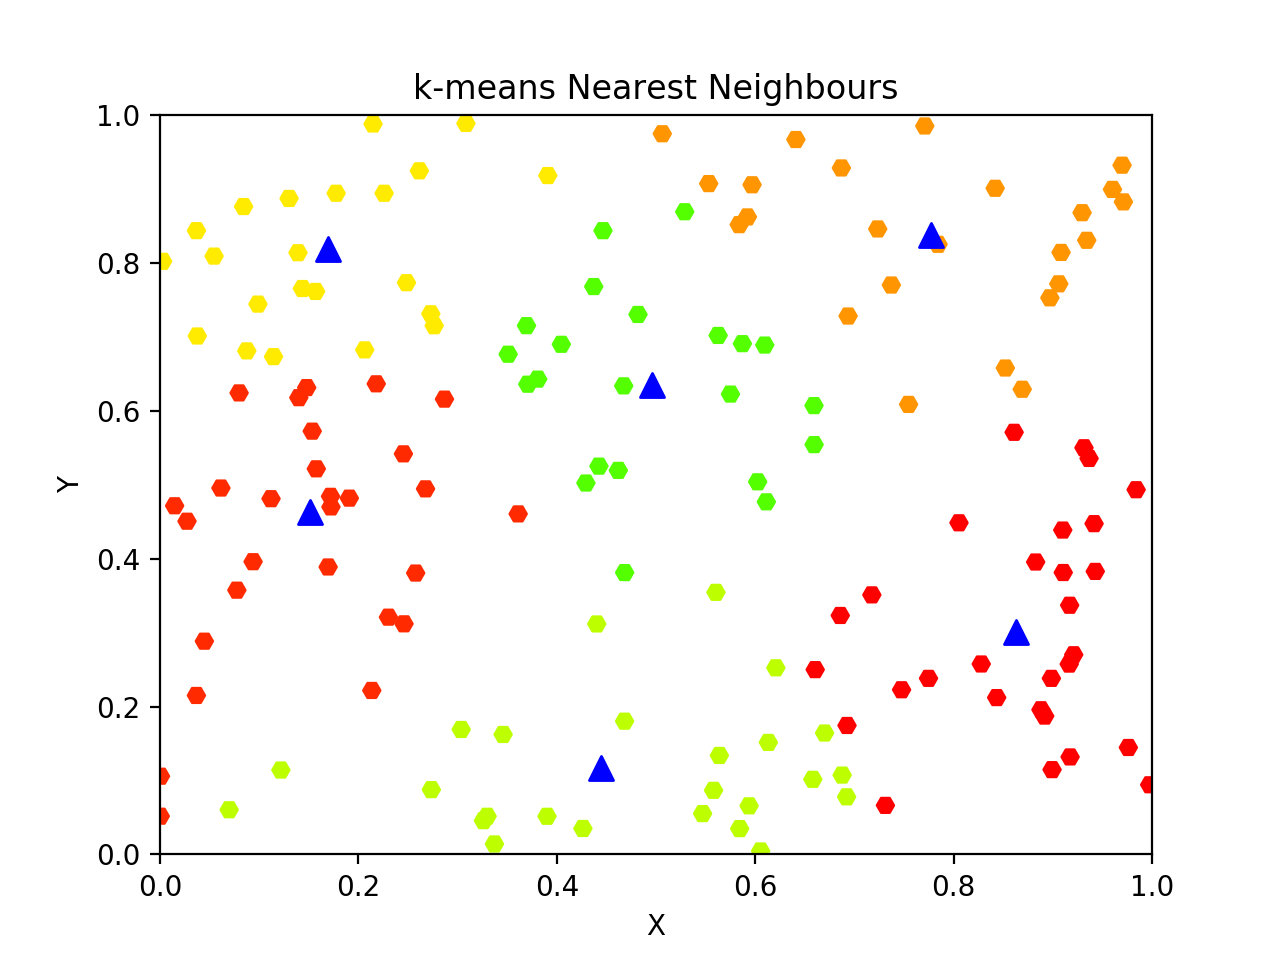

In [29]:
#This code shows the animation
fig=plt.figure()
P=animation.FuncAnimation(fig,animate,interval=150)